# 2-2. 프로젝트 2:날씨좋은월요일오후 세 시,자전거타는사람은몇명?

##(1)데이터가져오기

In [36]:
import pandas as pd
bicycle = pd.read_csv('./data/train.csv')
bicycle.info()
print('shape:', bicycle.shape)
bicycle.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
shape: (10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [37]:
# 원본 복사
df = bicycle.copy()

# pandas dateime - dt
dt = pd.to_datetime(df['datetime']).dt

# 컬럼 추가
df['year'] = dt.year
df['month'] = dt.month
df['day'] =  dt.day
df['hour'] = dt.hour
df['minute'] = dt.minute
df['second'] = dt.second
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  hour        10886 non-null  int64  
 16  minute      10886 non-null  int64  
 17  second      10886 non-null  int64  
dtypes: float64(3), int64(14), object(1)
memory usage: 1.5+ MB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
sns.countplot 활용해서 시각화하기
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

<Axes: xlabel='second', ylabel='count'>

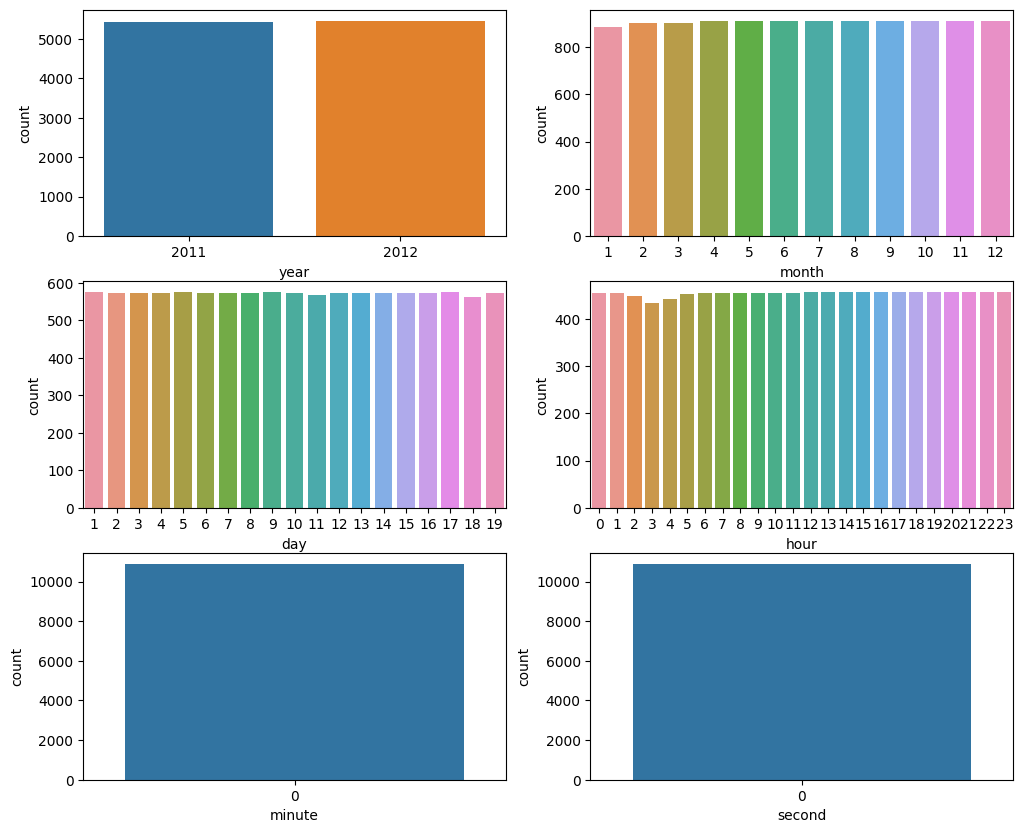

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
sns.countplot(x="year", data=df, ax=ax[0, 0])
sns.countplot(x="month", data=df, ax=ax[0, 1])
sns.countplot(x="day", data=df, ax=ax[1, 0])
sns.countplot(x="hour", data=df, ax=ax[1, 1])
sns.countplot(x="minute", data=df, ax=ax[2, 0])
sns.countplot(x="second", data=df, ax=ax[2, 1])

## (4) X, y 컬럼 선택 및 train/test 데이터 분리
X : datetime, casual, registered, count, second 컬럼 제외  
y : count 컬럼 데이터

In [40]:
X = df[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed',
        'year','month','day','hour','minute']]
y = df['count']
X.info()
X.head()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('train:', X_train.shape, y_train.shape)
print('test:', X_test.shape, y_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   year        10886 non-null  int64  
 9   month       10886 non-null  int64  
 10  day         10886 non-null  int64  
 11  hour        10886 non-null  int64  
 12  minute      10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB
train: (8708, 13) (8708,)
test: (2178, 13) (2178,)


## (5) LinearRegression 모델 학습

In [41]:
from sklearn.linear_model import LinearRegression
# 모델 생성
model = LinearRegression()
# 학습
model.fit(X_train, y_train)
# 테스트
predictions = model.predict(X_test)

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [42]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)
print('mse:', mse)
print('rmse:', np.sqrt(mse))

mse: 19945.37005375341
rmse: 141.22807813516903


## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

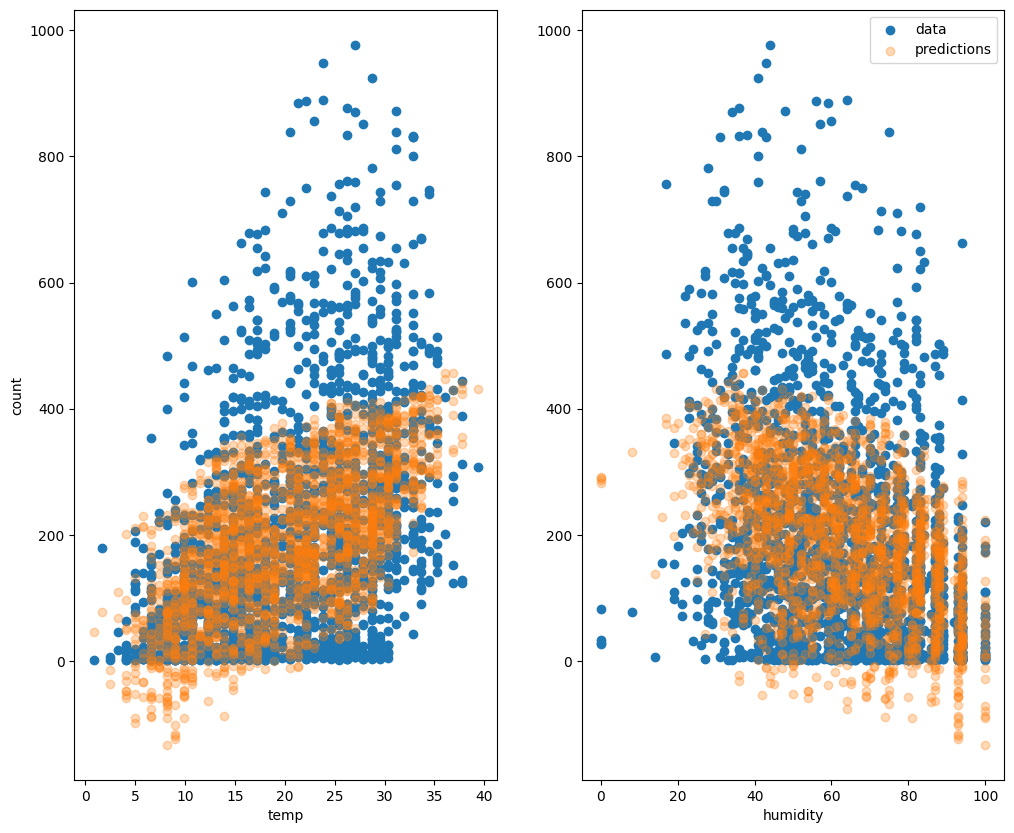

In [43]:
plt.figure(figsize=(12,10))

plt.subplot(1, 2, 1)
plt.scatter(X_test['temp'], y_test, label="data")
plt.scatter(X_test['temp'], predictions, label="predictions", alpha=0.3)
plt.xlabel('temp')
plt.ylabel('count')


plt.subplot(1, 2, 2)
plt.scatter(X_test['humidity'], y_test, label="data")
plt.scatter(X_test['humidity'], predictions, label="predictions", alpha=0.3)
plt.xlabel('humidity')

plt.legend()
plt.show()